# Notebook Imports and Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib import cm # color map
from mpl_toolkits.mplot3d.axes3d import Axes3D
from sympy import symbols, diff
from math import log

%matplotlib inline

# Example 1 - A Simple const function

## $$f(x) = x^2 + x + 1$$

In [2]:
def f(x):
    return x**2 + x + 1

In [3]:
x_1 = np.linspace(start=-3, stop=3, num=500)

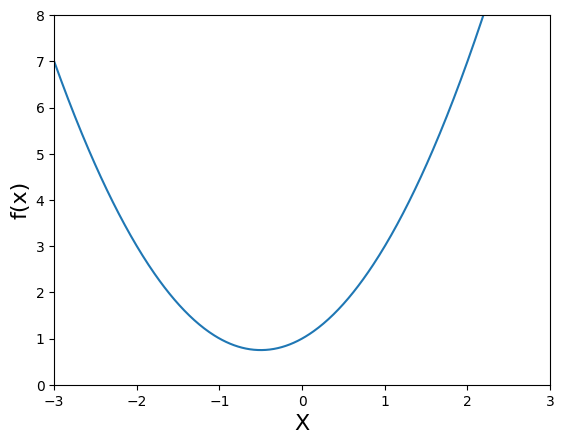

In [4]:
#Plot 
plt.xlim([-3, 3])
plt.ylim(0, 8)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.plot(x_1, f(x_1))
plt.show()

## Slope & Derivatives

Challenge: Create a python function for the derivative of $f(x)$ called df(x)

In [5]:
def df(x):
    return 2*x + 1

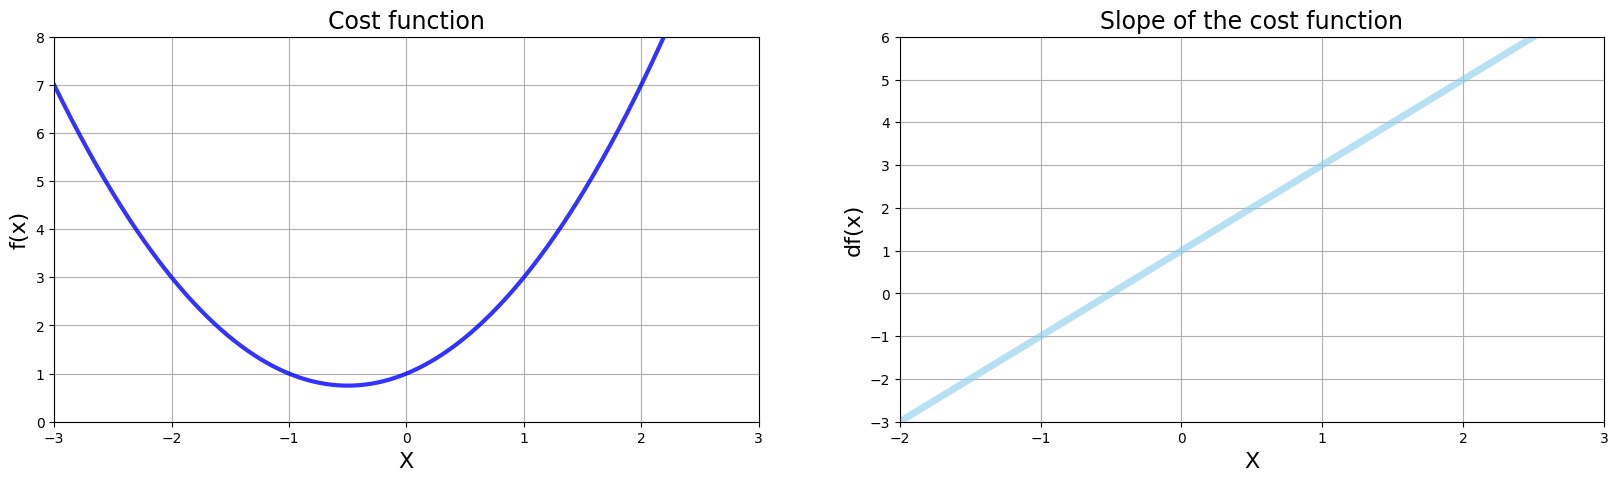

In [6]:
#Plot function and derivative side by side


plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.grid()
plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.6)

plt.show()

## Python Loops & Gradient Descent

In [7]:
# Python For Loop
for n in range(5):
    print('Hello world', n)
print('End of loop')

Hello world 0
Hello world 1
Hello world 2
Hello world 3
Hello world 4
End of loop


In [8]:
# Python while loop
counter = 0
while counter < 5:
    print('Counter ...', counter)
    counter = counter + 1
print('Realy or not, here I come!')

Counter ... 0
Counter ... 1
Counter ... 2
Counter ... 3
Counter ... 4
Realy or not, here I come!


In [9]:
# Gradient Descent
new_x = 3
previous_x = 0
step_multiplier = 0.1
precision = 0.0001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    step_size = abs(new_x - previous_x)
    # print(step_size)
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    if step_size < precision:
        print('Loop ran this many times:', n)
        break
    
print('Local minimum occurs at', new_x)
print('Slope or df(x) value at this point is :', df(new_x))
print('f(x) value or cost at this point is :', f(new_x))

Loop ran this many times: 40
Local minimum occurs at -0.49962781616118024
Slope or df(x) value at this point is : 0.0007443676776395236
f(x) value or cost at this point is : 0.7500001385208099


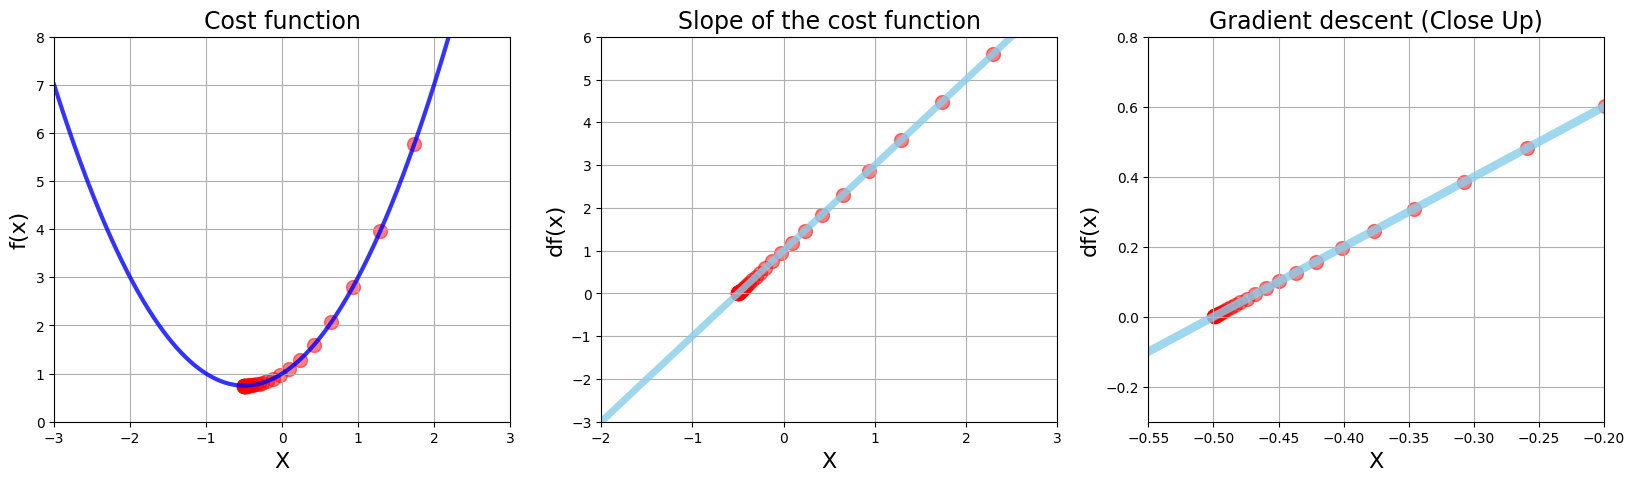

In [10]:
# Superimpose the gradient descent calculations on plot


plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 3, 1)

plt.grid()
plt.xlim(-3, 3)
plt.ylim(0, 8)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red', s=100, alpha= 0.5)

# 2 Chart: Derivative
plt.subplot(1, 3, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()
plt.xlim(-2, 3)
plt.ylim(-3, 6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=100, alpha= 0.5)

# 3 Chart: Derivative (Close Up)
plt.subplot(1, 3, 3)

plt.title('Gradient descent (Close Up)', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()
plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=6, alpha=0.8)
plt.scatter(x_list, slope_list, color='red', s=100, alpha= 0.5)

plt.show()

## Example 2 - Multiple Minima vs Initial Guess & Adanced

## $$g(x) = x^4 - 4x^2 + 5$$

In [11]:
# Make some data
x_2 = np.linspace(-2, 2, 1000)

# Challenge: Write the g(x) function and the dg(x) function in Python?
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

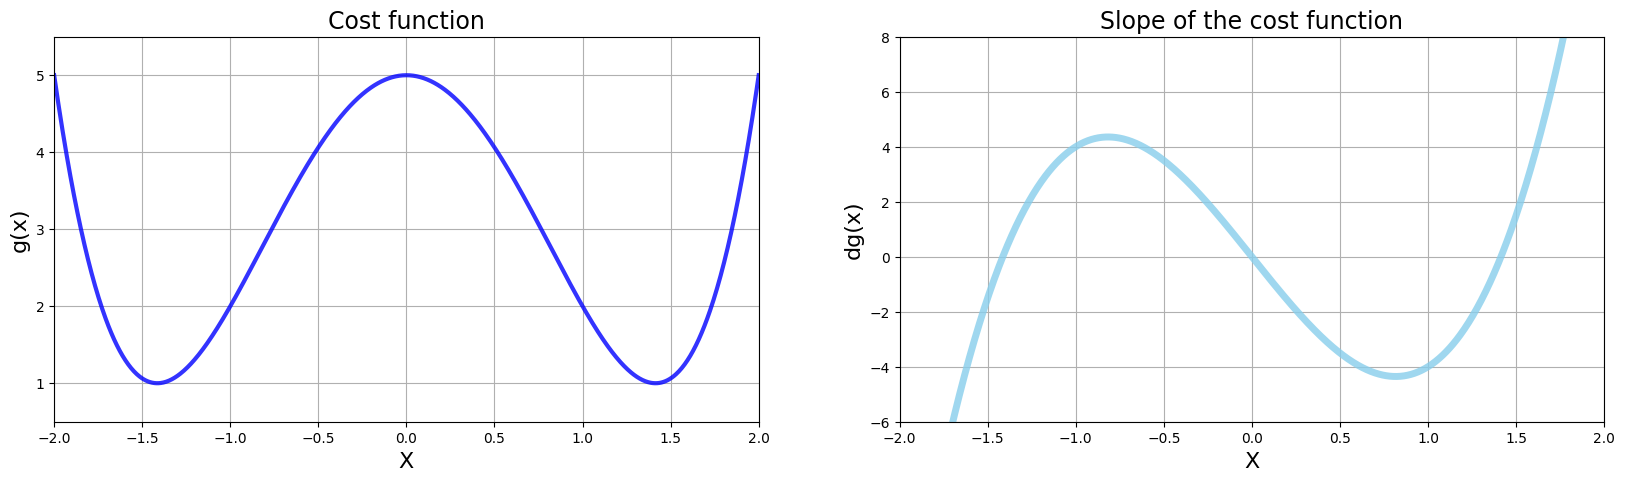

In [12]:
# Superimpose the gradient descent calculations on plot


plt.figure(figsize=[20, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.grid()
plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)

values = np.array(x_list)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.8)

plt.show()

## Gradient Descent as a Python function

In [13]:
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=0.001,
                    max_iter=300):
    new_x = initial_guess
    x_list = [new_x]
    slope_list = [derivative_func(new_x)]
    
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        
        step_size = abs(new_x - previous_x)
        
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        if step_size < precision:
            break
    return new_x, x_list, slope_list

In [14]:
local_min, list_x, deriv_list = gradient_descent(dg, 0.5, 0.02, 0.001)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: 1.4122375085019094
Number of steps: 23


In [15]:
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess= -0.1)
print('Local min occurs at:', local_min)
print('Number of steps:', len(list_x))

Local min occurs at: -1.4120887490901561
Number of steps: 34


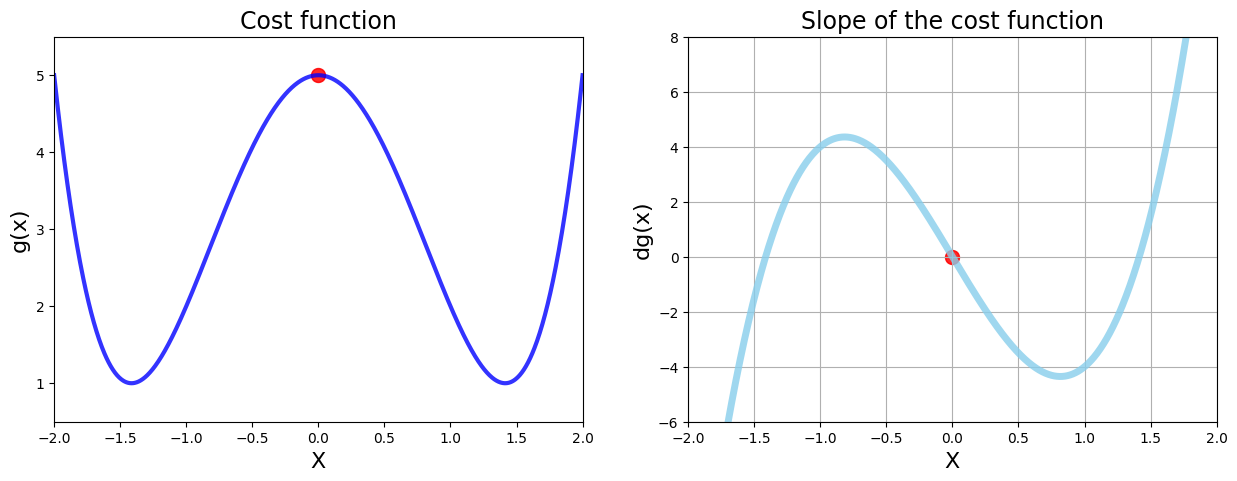

In [16]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func= dg, initial_guess= 0)

# Plot function and derivative and scatter plut side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.8)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.6)

plt.show()

# Example 3 - Divergence, Overflow and Python Tuples

## $$h(x) = x^5 - 2x^4 + 2$$

In [17]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

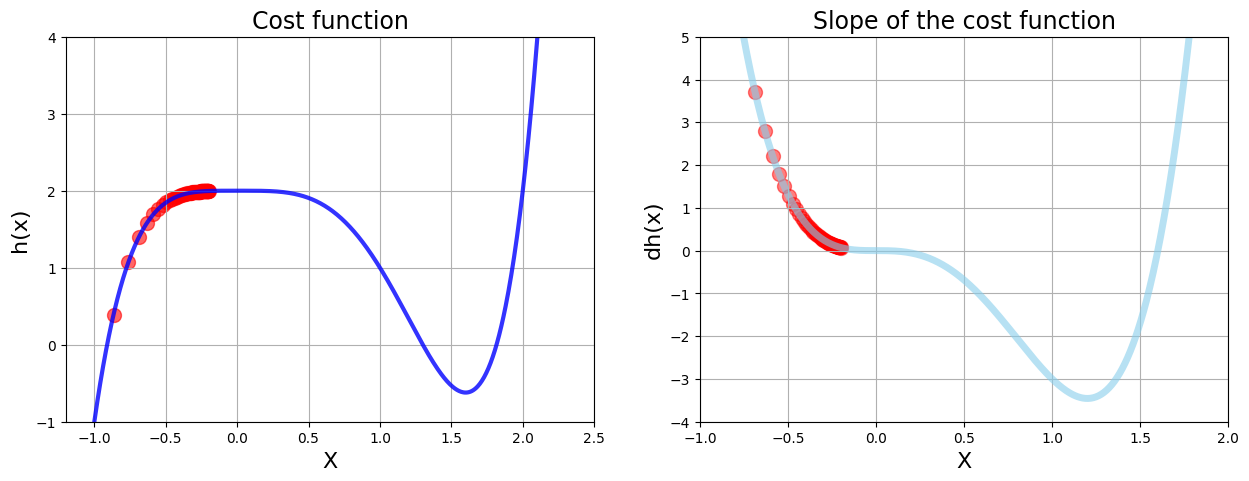

Local min occurs at: -1.8398461123332792e+24
Cost at this minimum is: -2.1081790694225687e+121
Number of steps: 72


In [18]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func= dh, initial_guess= -0.2,
                                                max_iter=71)

# Plot function and derivative and scatter plut side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.grid()
plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at:', local_min)
print('Cost at this minimum is:', h(local_min))
print('Number of steps:', len(list_x))

In [19]:
# 380.000.000.000.000.000.000.000.000.000.000
import sys
# help(sys)
# sys.version
# type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

## Python tuples

In [20]:
# Creating a tuple
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

# How to access a value in a tuple
print('I loooooove', breakfast[0])
print('My hotel has n°' + str(unlucky_numbers[1]) + 'the floor')

not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014

tuple_with_single_value = 42,
type(tuple_with_single_value)

main, side, greens = breakfast
print('main course is', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps is', len(data_tuple[1]))

I loooooove bacon
My hotel has n°4the floor
main course is bacon
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps is 117


# The Learning Rate

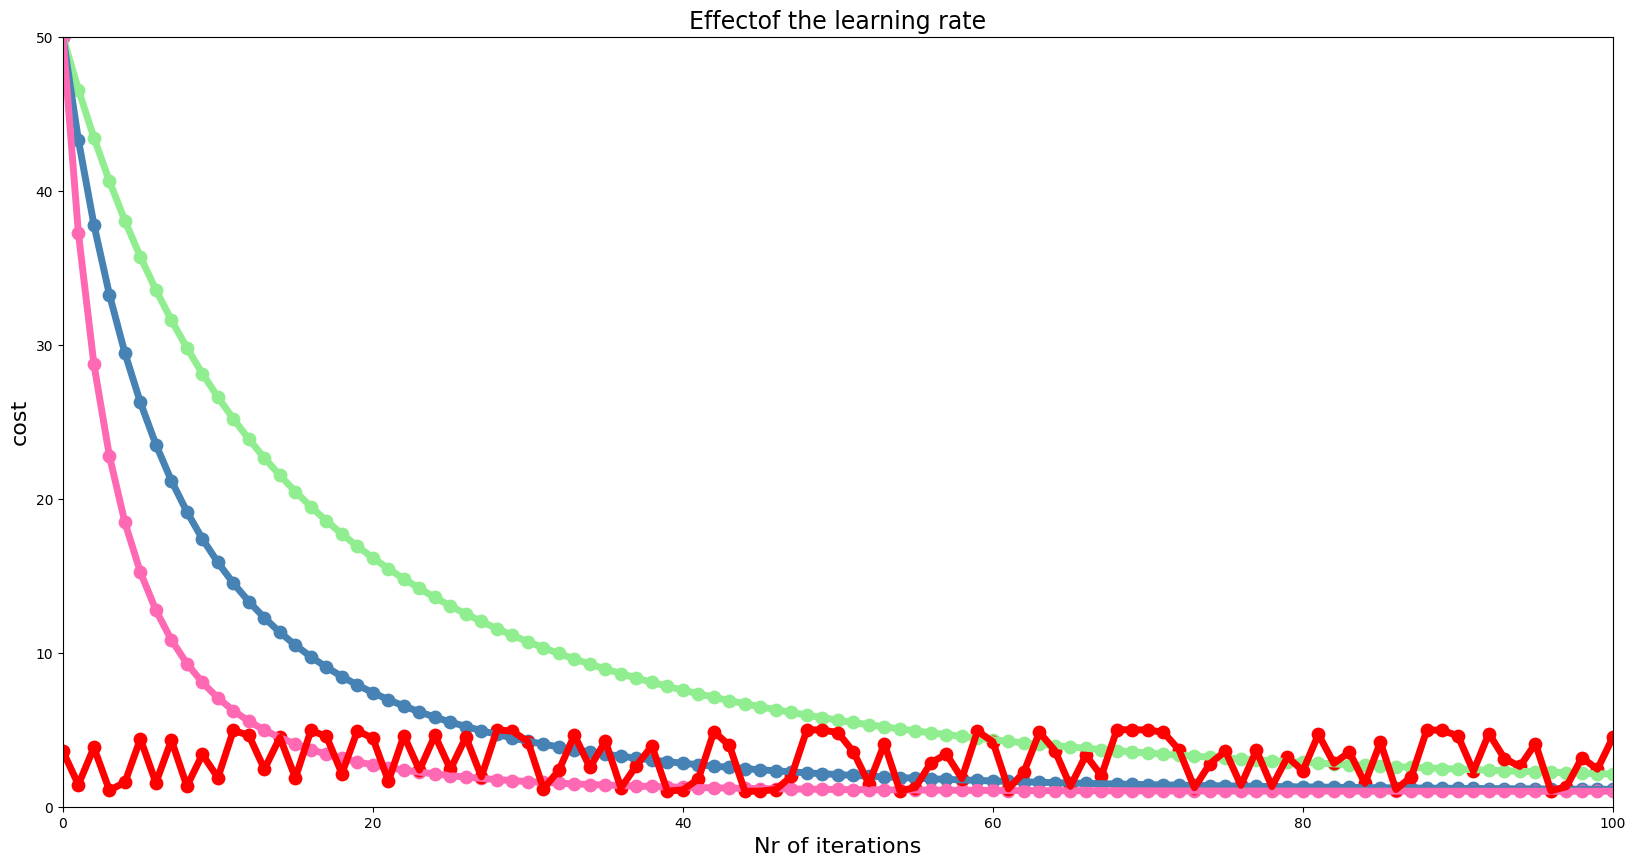

In [21]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, 
                                                 initial_guess=3, 
                                                 multiplier=0.0005, 
                                                 precision=0.0001, 
                                                 max_iter=n)

# Challenge: Plot two more learning rates: mid_gamma (0.001) and high_gamma (0.002) 
mid_gamma = gradient_descent(derivative_func=dg, 
                                                 initial_guess=3, 
                                                 multiplier=0.001, 
                                                 precision=0.0001, 
                                                 max_iter=n)
high_gamma = gradient_descent(derivative_func=dg, 
                                                 initial_guess=3, 
                                                 multiplier=0.002, 
                                                 precision=0.0001, 
                                                 max_iter=n)
insane_gamma = gradient_descent(derivative_func=dg, 
                                                 initial_guess=1.9, 
                                                 multiplier=0.25, 
                                                 precision=0.0001, 
                                                 max_iter=n)



# Plotting reduction in cost for each iteration
plt.figure(figsize=[20, 10])

plt.xlim(0, n)
plt.ylim(0, 50)

plt.title('Effectof the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotning low learning rate 1
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=5)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotning mid learning rate 2
plt.plot(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', linewidth=5)
plt.scatter(iteration_list, g(np.array(mid_gamma[1])), color='steelblue', s=80)

# Plotning high learning rate 3
plt.plot(iteration_list, g(np.array(high_gamma[1])), color='hotpink', linewidth=5)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color='hotpink', s=80)

# Plotning insane learning rate 4
plt.plot(iteration_list, g(np.array(insane_gamma[1])), color='red', linewidth=5)
plt.scatter(iteration_list, g(np.array(insane_gamma[1])), color='red', s=80)


plt.show()

# Example 4 - Data Viz with 3D Charts

## Minimise $$f(x, y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

Minimise $$f(x, y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [22]:
def f(x, y):
    r = 3**(-x**2 - y**2)
    return 1 / (r + 1)

In [23]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


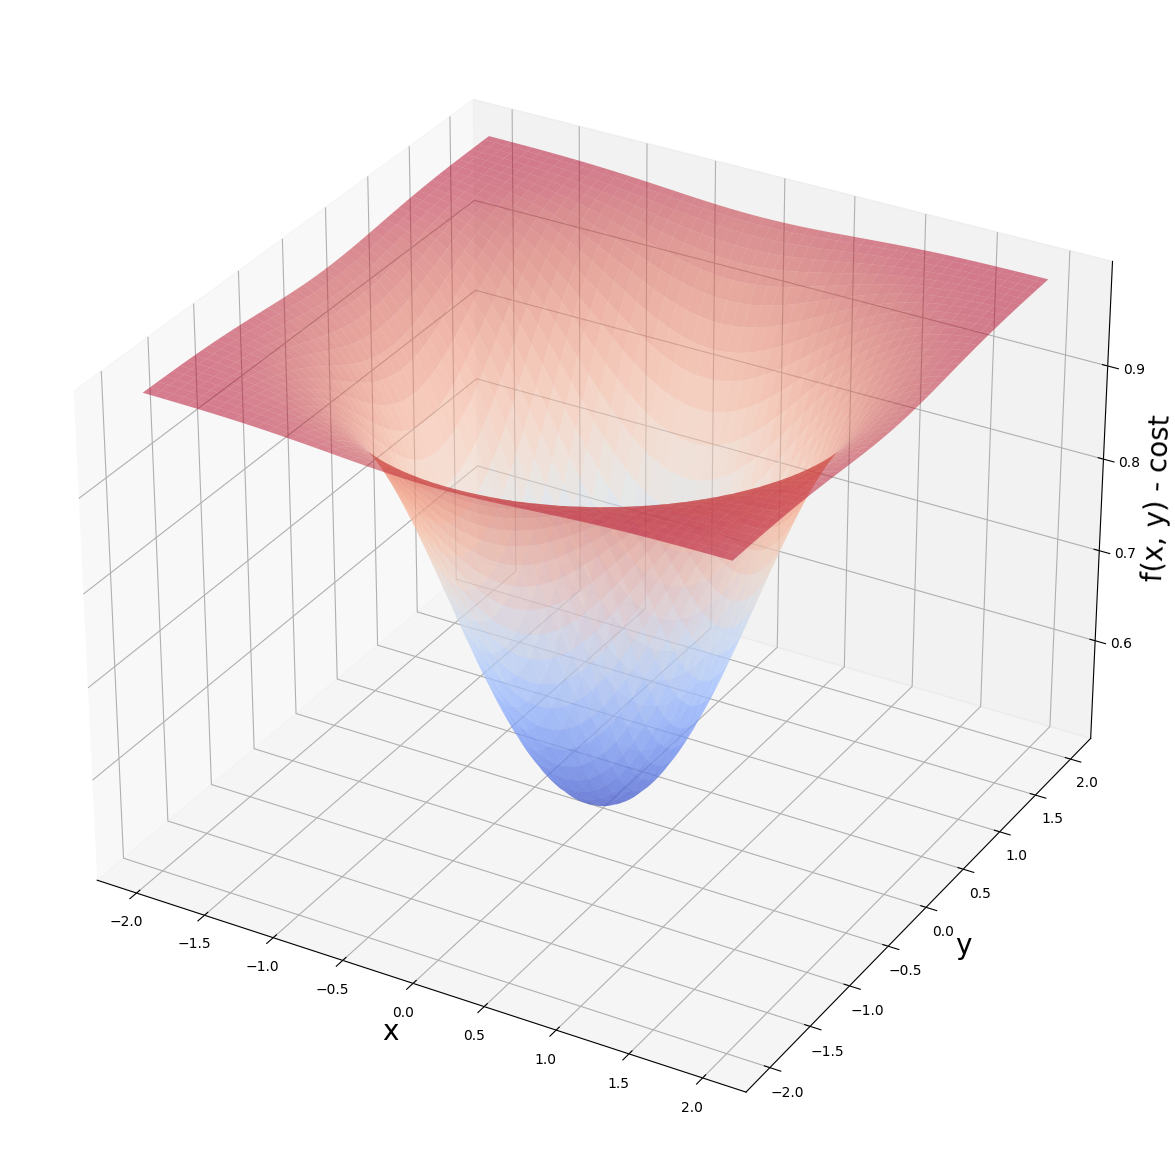

In [24]:
# Générating 3D Plot
fig = plt.figure(figsize=[16, 15])
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.set_zlabel('f(x, y) - cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.5)

plt.show()

# Partial Derivative & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \in(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \in(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

In [25]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2


# Batch gradient descent with SymPy

In [26]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Resultat
print('Value in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Value in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [27]:
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [29]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Resultat
print('Value in gradient array:', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Value in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


 # Graphing gradient descent & Adv Numpy Array

In [31]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # Initial guess
values_array = params.reshape(1, 2)

print(values_array.shape)


for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Resultat
print('Value in gradient array:', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Value in gradient array: [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


In [49]:
# Advanced Numpy Array Pracitice:
kirk = np.array([['captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band [0] :', hs_band[0])
print('hs_band [0],[1] :', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames :', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles ...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band [0] : ['Black Thought' 'MC']
hs_band [0],[1] : Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['captain' 'Guitar']]
Printing nicknames : ['Black Thought' 'Questlove' 'captain']
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']
